In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
df_turkey2013 = pd.read_excel('/Users/tativalentine/Desktop/FOOD/EDA/turkey2013.xlsx')
df_turkey2013.sample(5)

Start Date   End Date          Product Name  British Columbia  Alberta  \
31 2013-05-05 2013-06-01  Turkey breasts (tal)             16.05    15.78   
48 2013-08-25 2013-09-21          Turkey thigh             10.71     7.44   
59 2013-06-30 2013-07-27      Turkey drumstick              5.52     6.75   
36 2013-09-22 2013-10-19  Turkey breasts (tal)             16.16    10.74   
45 2013-06-02 2013-06-29          Turkey thigh             10.37     7.78   

    Saskatchewan  Manitoba  Remaining Ontario  Ontario  Remaining Quebec  \
31         13.88     12.92              12.82    12.86             15.63   
48          5.64      6.88               7.06     6.97              5.12   
59          5.78      6.40               6.57     6.48              5.66   
36         15.90     10.97              10.86    10.90             13.74   
45          5.69      6.59               6.57     6.58              5.60   

    Quebec  Maritimes  Newfoundland and Labrador  Canada  
31   15.70      12.46                      12.56   14.12  
48    5.97       7.80                       7.38    7.25  
59    5.10       4.71                       4.88    5.97  
36   13.20      12.90                      11.61   12.12  
45    6.78       7.32                       6.98    6.98

In [3]:
df_turkey2013['Start Date'] = pd.to_datetime(df_turkey2013['Start Date'])
df_turkey2013['End Date'] = pd.to_datetime(df_turkey2013['End Date'])

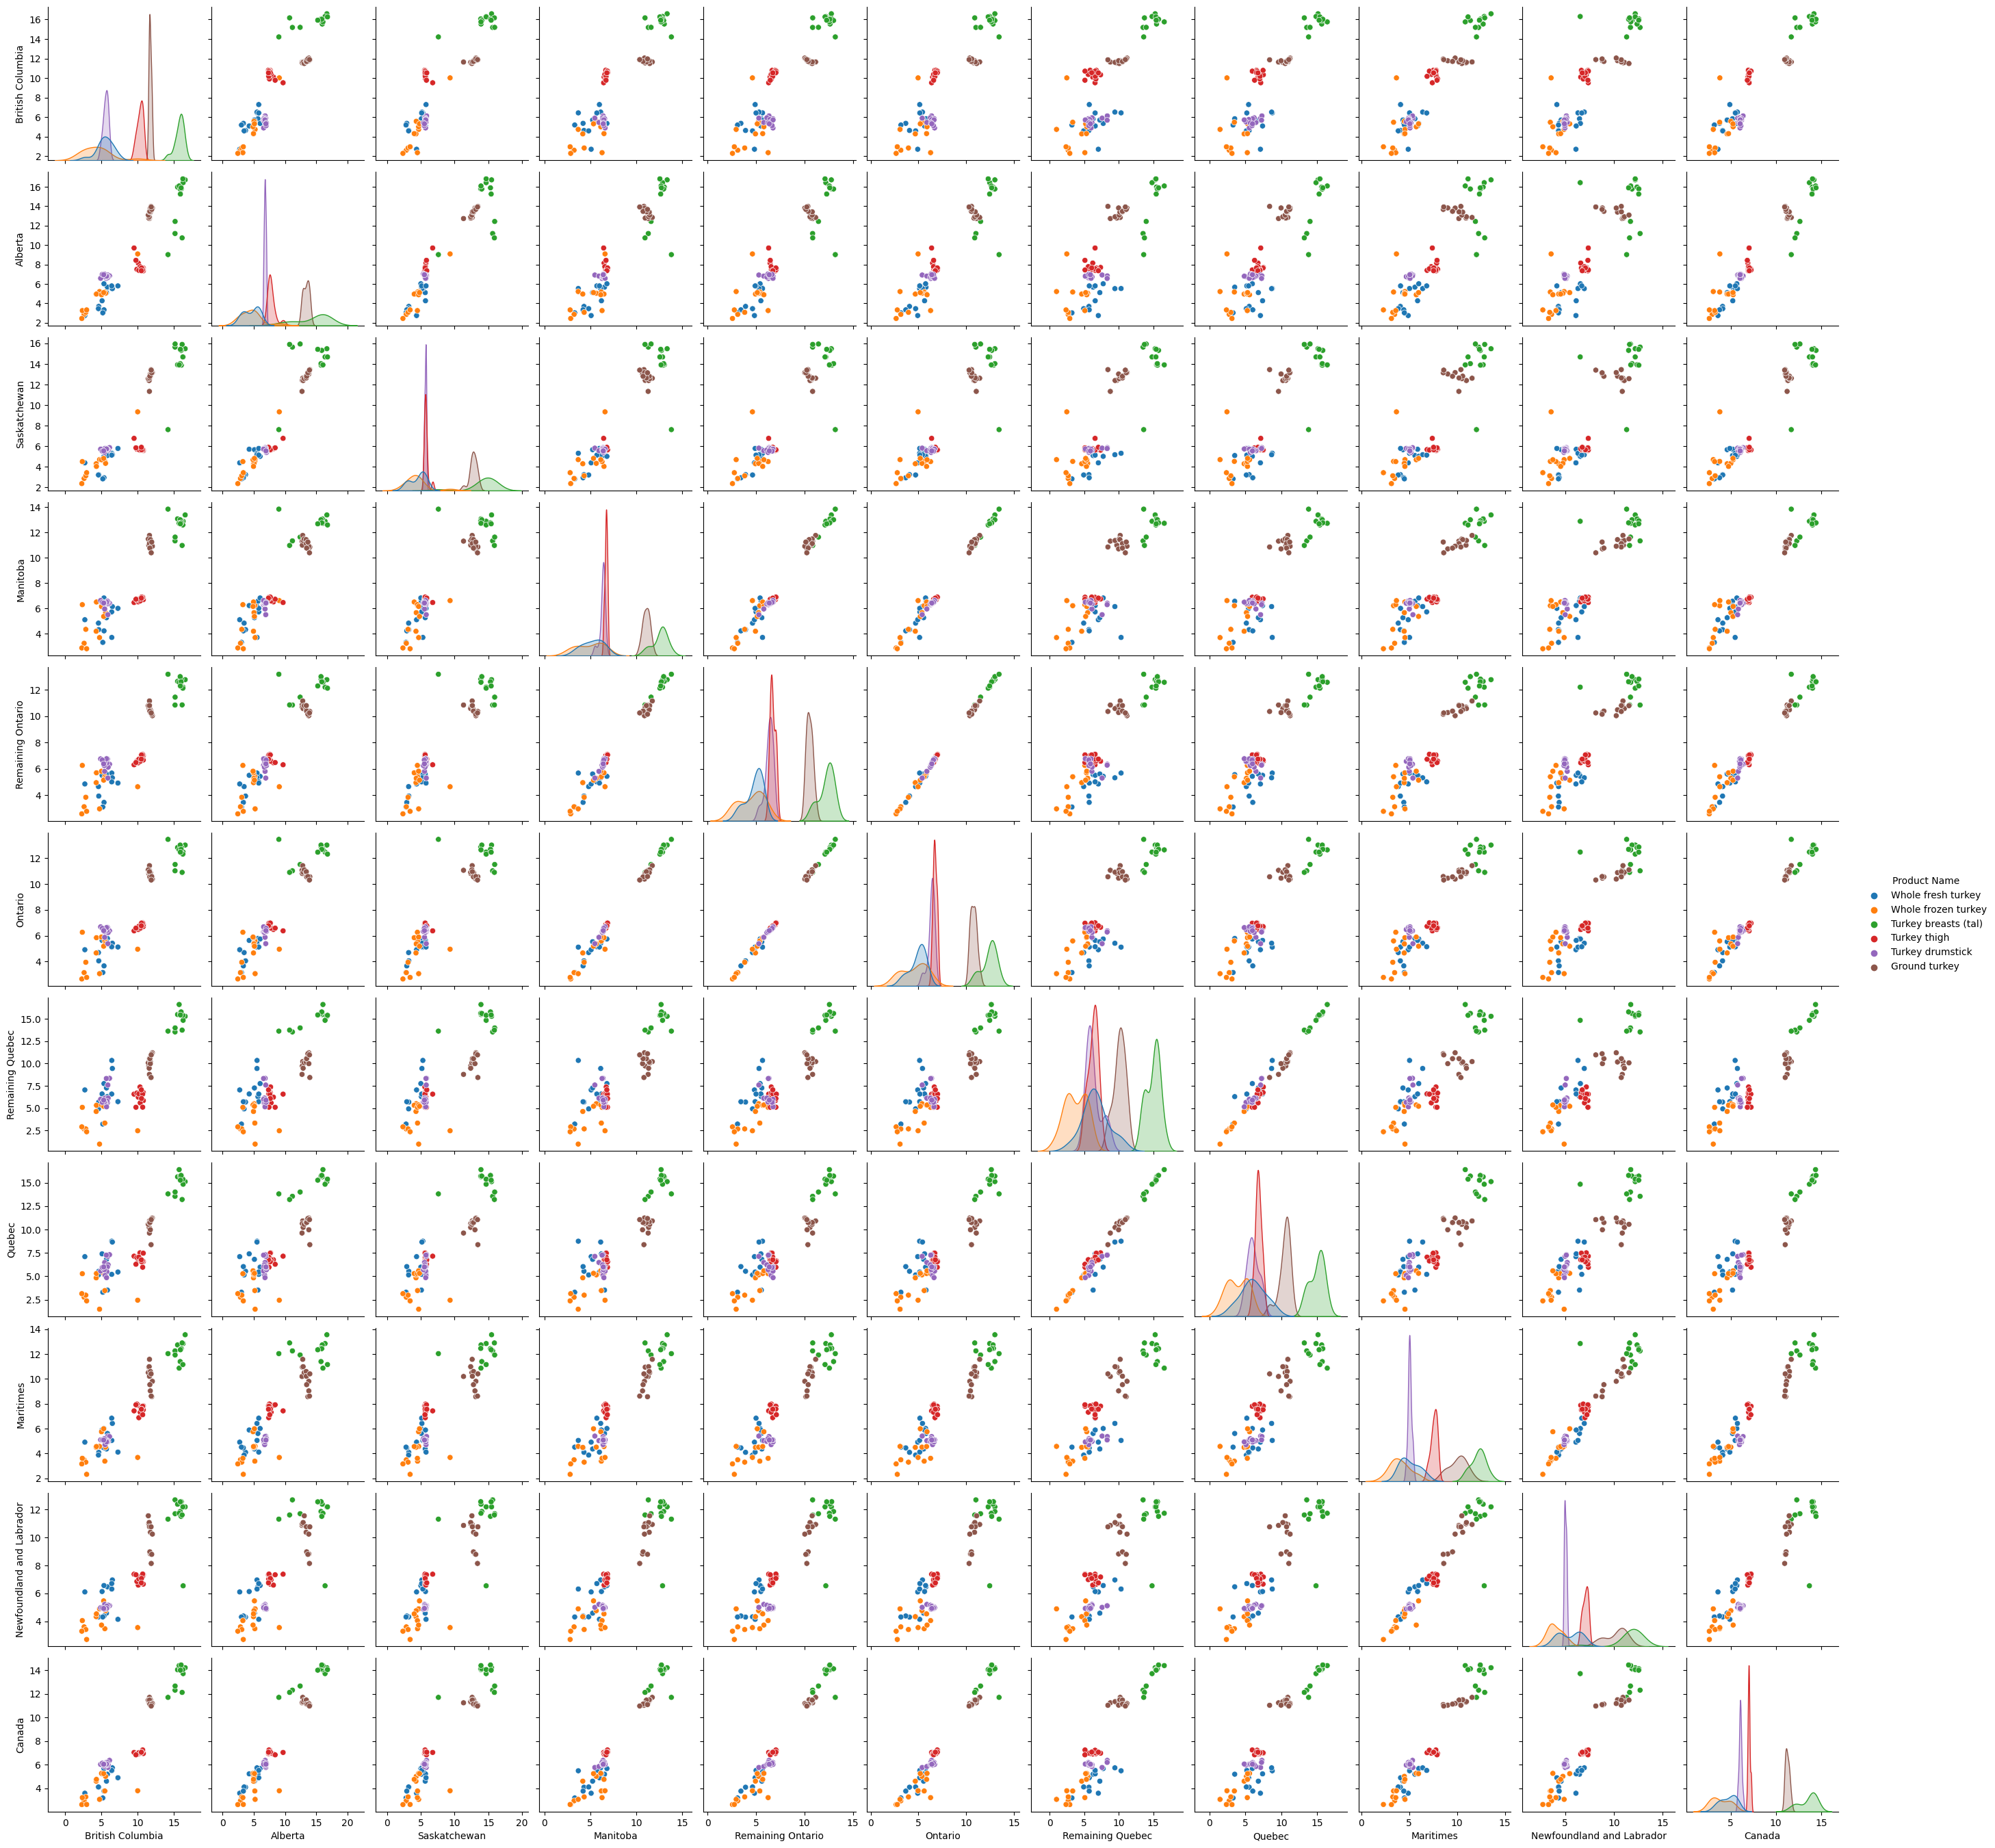

In [4]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df_turkey2013, hue='Product Name')
plt.show()

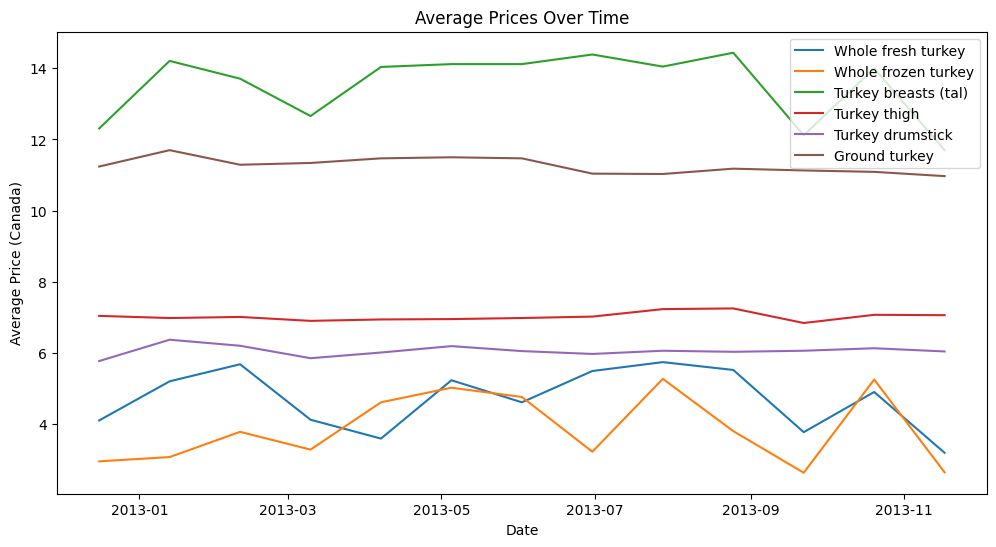

In [5]:
# Line plot to visualize average prices over time
plt.figure(figsize=(12, 6))
for product in df_turkey2013['Product Name'].unique():
    product_data = df_turkey2013[df_turkey2013['Product Name'] == product]
    plt.plot(product_data['Start Date'], product_data['Canada'], label=product)

plt.title('Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (Canada)')
plt.legend()
plt.show()

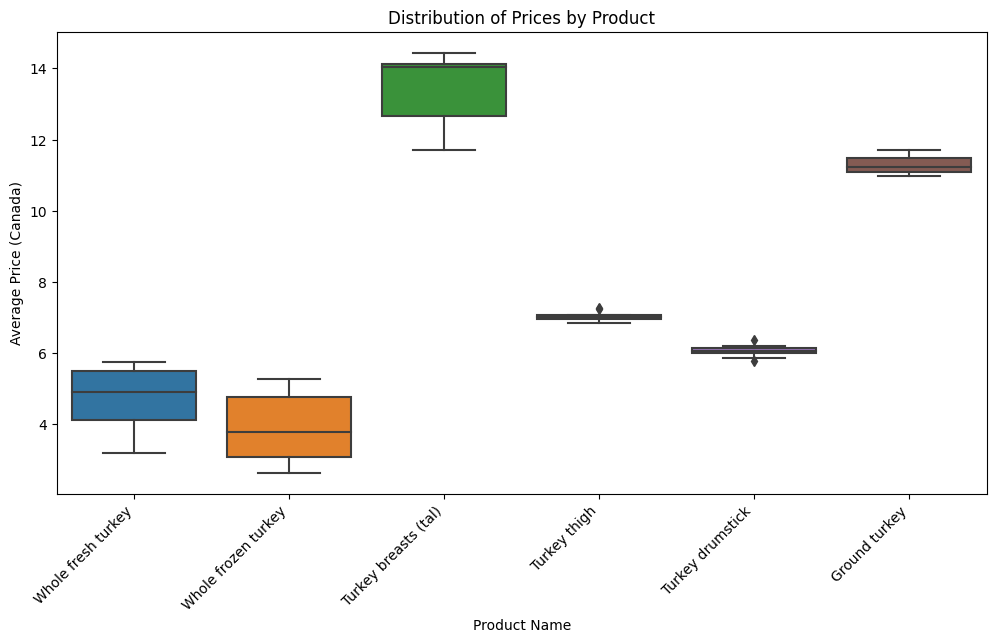

In [6]:
# Boxplot to visualize the distribution of prices by product
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Name', y='Canada', data=df_turkey2013)
plt.title('Distribution of Prices by Product')
plt.xlabel('Product Name')
plt.ylabel('Average Price (Canada)')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_14487/4172060334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_turkey2013.corr()


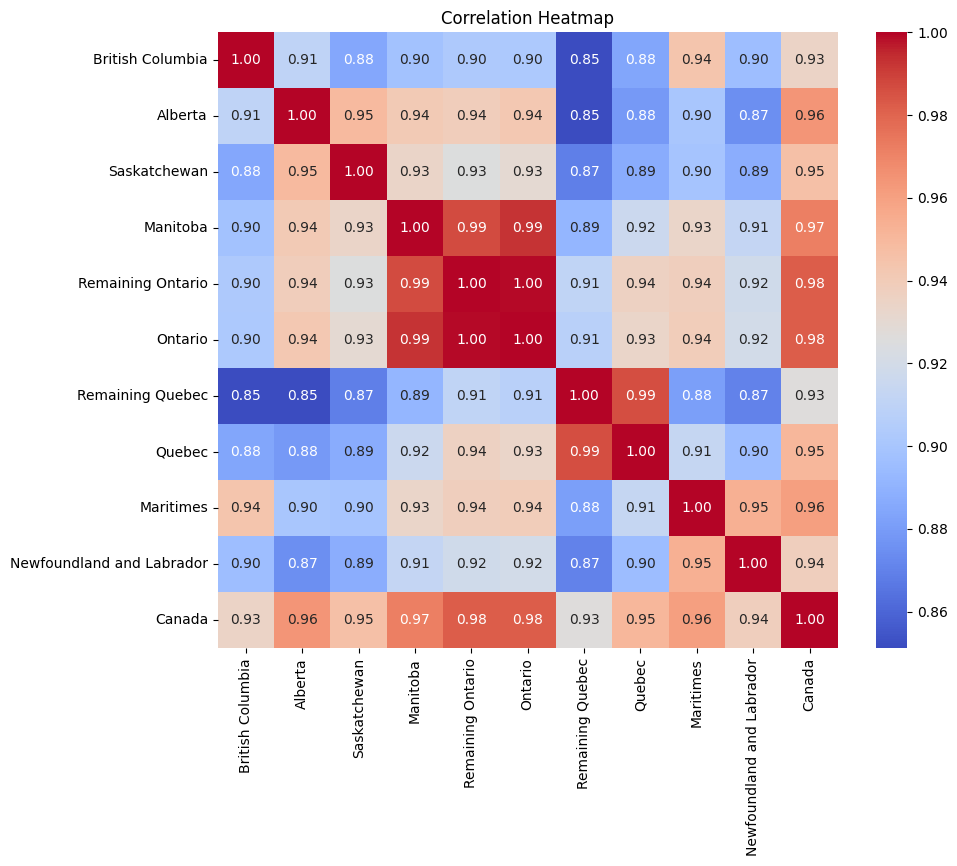

In [7]:
# Correlation heatmap to identify relationships between variables
correlation_matrix = df_turkey2013.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Specific Excel files
excel_files = ['Turkey2013.xlsx', 'Turkey2014.xlsx', 'Turkey2015.xlsx', 'Turkey2016.xlsx', 'Turkey2017.xlsx']

In [9]:
combined_data_turkey = pd.DataFrame()

In [10]:
import os

In [11]:
# Loop through each Excel file and concatenate its data to the combined_data DataFrame
for file in excel_files:
    file_path = os.path.join('/Users/tativalentine/Desktop/FOOD/EDA', file)
    df = pd.read_excel(file_path)  
    combined_data_turkey = pd.concat([combined_data_turkey, df], ignore_index=True)

In [12]:
# Save the combined data to a new Excel file
combined_data_turkey.to_excel('combined_data_turkey.xlsx', index=False)

In [13]:
print(combined_data_turkey.columns)

Index(['Start Date', 'End Date', 'Product Name', 'British Columbia', 'Alberta',
       'Saskatchewan', 'Manitoba', 'Remaining Ontario', 'Ontario',
       'Remaining Quebec', 'Quebec', 'Maritimes', 'Newfoundland and Labrador',
       'Canada', 'Montreal'],
      dtype='object')


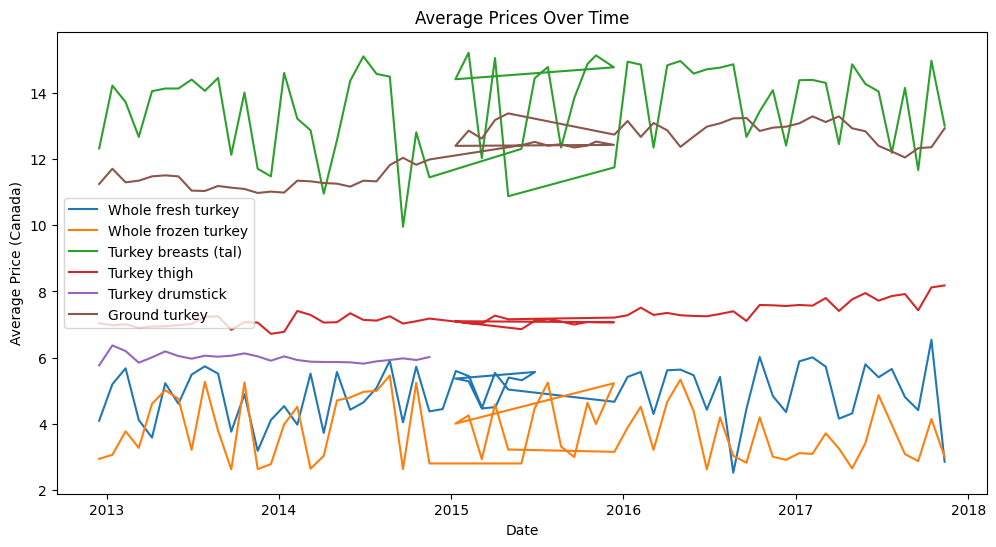

In [14]:
# Line plot to visualize average prices over time
plt.figure(figsize=(12, 6))
for product in combined_data_turkey['Product Name'].unique():
    product_data = combined_data_turkey[combined_data_turkey['Product Name'] == product]
    plt.plot(product_data['Start Date'], product_data['Canada'], label=product)

plt.title('Average Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (Canada)')
plt.legend()
plt.show()

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [16]:
# Select relevant columns
data_for_clustering = combined_data_turkey[['Start Date', 'Canada']]

In [17]:
# Standardize the data
scaler = StandardScaler()
data_for_clustering['Canada_scaled'] = scaler.fit_transform(data_for_clustering[['Canada']])

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_14487/3300462920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Canada_scaled'] = scaler.fit_transform(data_for_clustering[['Canada']])


In [18]:
# Define the number of clusters
num_clusters = 3

In [19]:
# Fit the k-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['Canada_scaled']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_14487/3821243014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering[['Canada_scaled']])


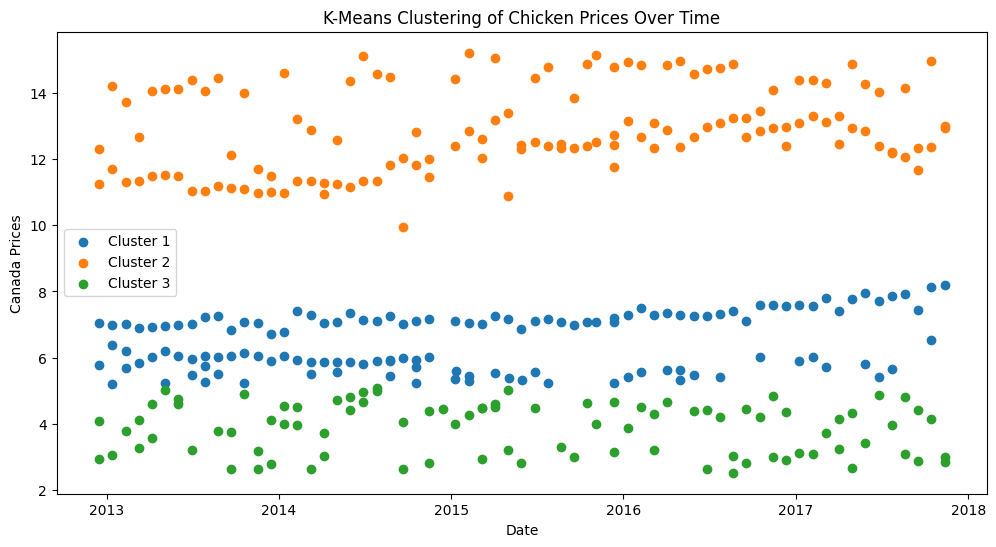

In [20]:
# Visualize the clusters
plt.figure(figsize=(12, 6))
for i in range(num_clusters):
    cluster_data = data_for_clustering[data_for_clustering['Cluster'] == i]
    plt.scatter(cluster_data['Start Date'], cluster_data['Canada'], label=f'Cluster {i + 1}')
    plt.title('K-Means Clustering of Chicken Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Canada Prices')
plt.legend()
plt.show()

In [21]:
# Calculate the difference between consecutive prices
combined_data_turkey['Price Change'] =combined_data_turkey['Canada'].diff()

# Calculate the percentage change between consecutive prices
combined_data_turkey['Percentage Change'] = combined_data_turkey['Canada'].pct_change() * 100

In [23]:
combined_data_turkey

Start Date   End Date        Product Name  British Columbia  Alberta  \
0   2012-12-16 2013-01-12  Whole fresh turkey              4.64     3.69   
1   2013-01-13 2013-02-09  Whole fresh turkey              5.84     5.67   
2   2013-02-10 2013-03-09  Whole fresh turkey              5.36     6.02   
3   2013-03-10 2013-04-06  Whole fresh turkey              4.60     3.46   
4   2013-04-07 2013-05-04  Whole fresh turkey              2.72     2.75   
..         ...        ...                 ...               ...      ...   
346 2017-07-23 2017-08-19       Ground turkey             13.46    13.54   
347 2017-08-20 2017-09-16       Ground turkey             13.68    13.37   
348 2017-09-17 2017-10-14       Ground turkey             13.39    13.20   
349 2017-10-15 2017-11-11       Ground turkey             13.88    13.43   
350 2017-11-12 2017-12-09       Ground turkey             14.00    13.20   

     Saskatchewan  Manitoba  Remaining Ontario  Ontario  Remaining Quebec  \
0            3.23      4.32               3.93     4.06              5.69   
1            5.09      6.56               5.56     5.79              6.30   
2            5.01      6.82               5.43     5.75              7.76   
3            3.20      4.83               4.65     4.70              4.93   
4            4.38      5.10               4.85     4.92              7.05   
..            ...       ...                ...      ...               ...   
346         12.52     12.62                NaN    11.18               NaN   
347         12.21     12.39                NaN    10.85               NaN   
348         12.63     12.87                NaN    11.37               NaN   
349         13.08     13.24                NaN    11.12               NaN   
350         12.77     13.00                NaN    12.20               NaN   

     Quebec  Maritimes  Newfoundland and Labrador  Canada  Montreal  \
0      5.54       4.09                       4.30    4.10       NaN   
1      3.53       5.61                       6.47    5.20       NaN   
2      5.98       6.01                       6.56    5.68       NaN   
3      5.15       3.87                       4.32    4.12       NaN   
4      7.10       4.91                       6.10    3.59       NaN   
..      ...        ...                        ...     ...       ...   
346   12.63      11.37                      13.47   12.22       NaN   
347   12.57      11.46                      13.48   12.04       NaN   
348   13.07      11.32                      13.39   12.32       NaN   
349   13.42      12.44                      14.09   12.35       NaN   
350   13.84      12.49                      14.83   12.92       NaN   

     Price Change  Percentage Change  
0             NaN                NaN  
1            1.10          26.829268  
2            0.48           9.230769  
3           -1.56         -27.464789  
4           -0.53         -12.864078  
..            ...                ...  
346         -0.17          -1.372074  
347         -0.18          -1.472995  
348          0.28           2.325581  
349          0.03           0.243506  
350          0.57           4.615385  

[351 rows x 17 columns]